## Import The Library

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

## Preparasi Data Contohnya

###### Di baris ini kita akan memproses dan menyiapkan beberapa contoh sampel untuk siap dianalisis menggunakan instrumentasi yang sesuai/yang diinginkan nantinya. Dicontoh data ini kita hanya menampilkan data beberapa benua dan total penduduknya disetiap benua nya

In [10]:
def buat_data_contoh():
    """Membuat dataset contoh populasi dunia"""
    data = {
        'Tahun': list(range(2010, 2023)) * 6,
        'Benua': np.repeat(['Asia', 'Afrika', 'Eropa', 'Amerika', 'Australia', 'Antartika'], 13),
        'Populasi_Juta': [
            # Asia
            4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900, 5000, 5100, 5200, 5300, 5400,
            # Afrika
            1100, 1150, 1200, 1250, 1300, 1350, 1400, 1450, 1500, 1550, 1600, 1650, 1700,
            # Eropa
            740, 742, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753,
            # Amerika
            1000, 1010, 1020, 1030, 1040, 1050, 1060, 1070, 1080, 1090, 1100, 1110, 1120,
            # Australia
            25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
            # Antartika
            0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004, 0.004
        ]
    }
    return pd.DataFrame(data)

## Pembersihan Data

###### Kita akan melakukan pembersihan data dari beberapa data seperti :
###### 1. Data Duplikat
###### 2. Data yang bukan angka atau NaN
###### 3. Data yang isinya kosong atau Null

###### Pembersihan data sangat penting untuk kelancaran proses visualisasi data yang akan kita lakukan, karena jika tidak melakukan proses cleaning data hasilnya akan jelek dan banyak dengan data-data yang kosong ataupun yang duplikat, Hal itu sering terjadi ketika kita hanya mengekstrak file raw nya (Hasil jadinya aja tanpa di cleaning)

In [11]:
def bersihkan_data(df):
    """Membersihkan dan memproses data"""
    # 1. Filter data yang tidak valid
    df = df[df['Populasi_Juta'] > 0]
    
    # 2. Hitung pertumbuhan populasi
    df = df.sort_values(['Benua', 'Tahun'])
    df['Pertumbuhan'] = df.groupby('Benua')['Populasi_Juta'].pct_change() * 100
    
    # 3. Format angka
    df['Populasi_Formatted'] = df['Populasi_Juta'].apply(lambda x: f"{x:,.1f} juta")
    
    # 4. Kategorikan berdasarkan ukuran benua (VERSI DIPERBAIKI)
    def tentukan_kategori(populasi):
        if populasi > 3000:
            return 'Sangat Besar'
        elif populasi > 1000:
            return 'Besar'
        elif populasi > 100:
            return 'Sedang'
        else:
            return 'Kecil'
    
    df['Kategori_Ukuran'] = df['Populasi_Juta'].apply(tentukan_kategori)
    
    return df

## Visualisasi dengan seaborn


###### Setelah melewati 2 tahapan, saat ini kita akan melakukan proses visualisasi data dengan menggunakan library python yaitu seaborn, Dimana library ini sangat membantu kita dalam hal membuat visual data menjadi lebih rapih dan mudah dipahami oleh orang-orang awam

In [12]:
def visualisasi_seaborn(df):
    """Visualisasi data menggunakan Seaborn"""
    plt.figure(figsize=(12, 8))
    
    # Style seaborn
    sns.set_style("whitegrid")
    sns.set_palette("husl")
    
    # Line plot dengan confidence interval
    ax = sns.lineplot(
        data=df,
        x='Tahun',
        y='Populasi_Juta',
        hue='Benua',
        style='Kategori_Ukuran',
        markers=True,
        dashes=False,
        linewidth=2.5,
        ci=None  # Remove confidence interval for clean look
    )
    
    # Formatting
    ax.set_title('Perkembangan Populasi per Benua (2010-2022)', fontsize=16, pad=20)
    ax.set_xlabel('Tahun', fontsize=12)
    ax.set_ylabel('Populasi (juta)', fontsize=12)
    
    # Format y-axis dengan separator ribuan
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}"))
    
    # Rotate x-ticks untuk readability
    plt.xticks(rotation=45)
    
    # Adjust legend
    plt.legend(title='Keterangan', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Tight layout
    plt.tight_layout()
    
    # Simpan gambar
    plt.savefig('populasi_seaborn.png', dpi=300, bbox_inches='tight')
    plt.show()

## Visualisasi dengan matplotlib

In [13]:
def visualisasi_matplotlib(df):
    """Visualisasi data menggunakan Matplotlib"""
    plt.figure(figsize=(12, 8))
    
    # Warna custom
    colors = plt.cm.tab10.colors
    
    # Plot untuk setiap benua
    benua_unik = df['Benua'].unique()
    for i, benua in enumerate(benua_unik):
        data_benua = df[df['Benua'] == benua]
        plt.plot(
            data_benua['Tahun'],
            data_benua['Populasi_Juta'],
            label=benua,
            color=colors[i],
            marker='o',
            linestyle='-',
            linewidth=2,
            markersize=8
        )
    
    # Formatting
    plt.title('Perkembangan Populasi per Benua (2010-2022)', fontsize=16, pad=20)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Populasi (juta)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Format y-axis
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f"{int(x):,}"))
    
    # Rotate x-ticks
    plt.xticks(rotation=45)
    
    # Legend di luar plot
    plt.legend(title='Benua', bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Tight layout
    plt.tight_layout()
    
    # Simpan gambar
    plt.savefig('populasi_matplotlib.png', dpi=300, bbox_inches='tight')
    plt.show()

## Analisis Pertumbuhan

###### Dibaris ini kita akan menganalisis pertumbuhan pertahun penduduk dari suatu benua

In [14]:
def analisis_pertumbuhan(df):
    """Visualisasi pertumbuhan populasi"""
    plt.figure(figsize=(12, 6))
    
    # Heatmap pertumbuhan
    pivot_df = df.pivot_table(index='Benua', columns='Tahun', values='Pertumbuhan')
    
    sns.heatmap(
        pivot_df,
        annot=True,
        fmt=".1f",
        cmap="coolwarm",
        center=0,
        linewidths=.5,
        cbar_kws={'label': 'Persentase Pertumbuhan (%)'}
    )
    
    plt.title('Pertumbuhan Populasi per Benua (%)', fontsize=16, pad=20)
    plt.xlabel('Tahun', fontsize=12)
    plt.ylabel('Benua', fontsize=12)
    plt.tight_layout()
    plt.savefig('pertumbuhan_populasi.png', dpi=300, bbox_inches='tight')
    plt.show()

## Eksekusi semua function

Contoh Data Setelah Pembersihan:
    Tahun   Benua  Populasi_Juta  Pertumbuhan Populasi_Formatted  \
13   2010  Afrika         1100.0          NaN       1,100.0 juta   
14   2011  Afrika         1150.0     4.545455       1,150.0 juta   
15   2012  Afrika         1200.0     4.347826       1,200.0 juta   
16   2013  Afrika         1250.0     4.166667       1,250.0 juta   
17   2014  Afrika         1300.0     4.000000       1,300.0 juta   

   Kategori_Ukuran  
13           Besar  
14           Besar  
15           Besar  
16           Besar  
17           Besar  


C:\Users\freef\AppData\Local\Temp\ipykernel_13796\3812110808.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.lineplot(


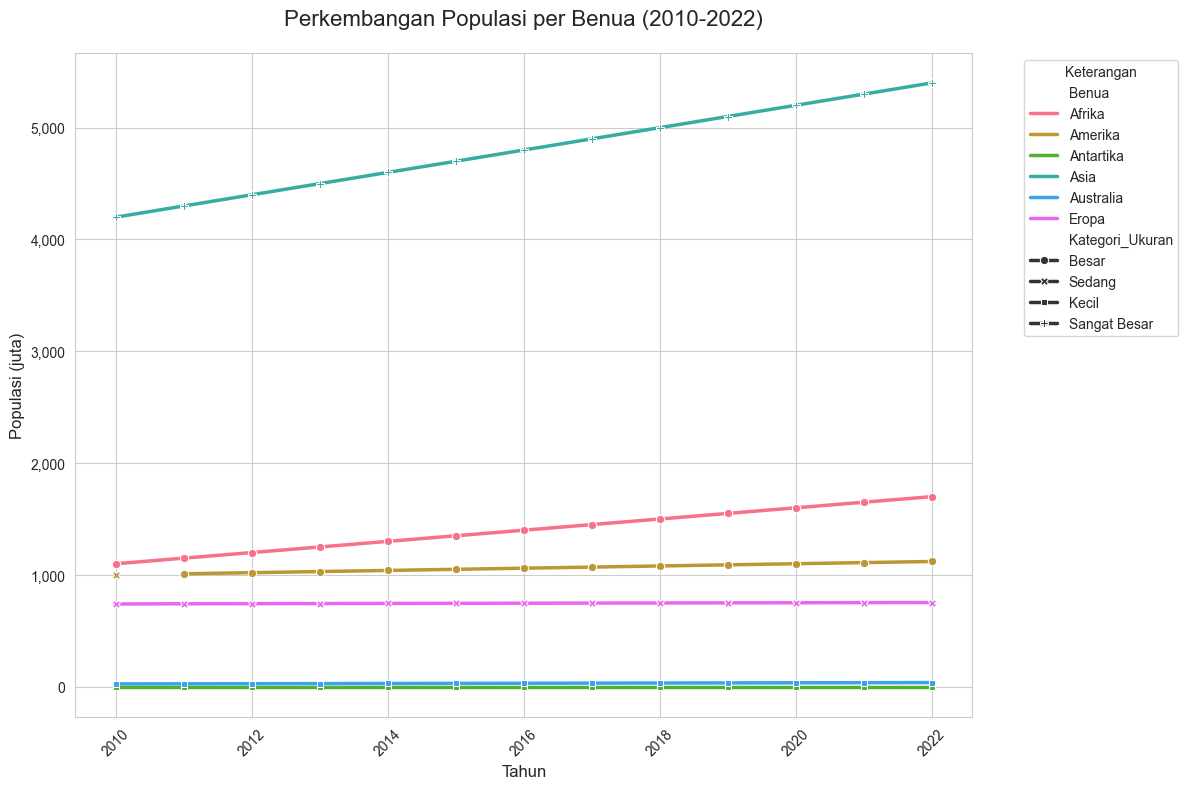

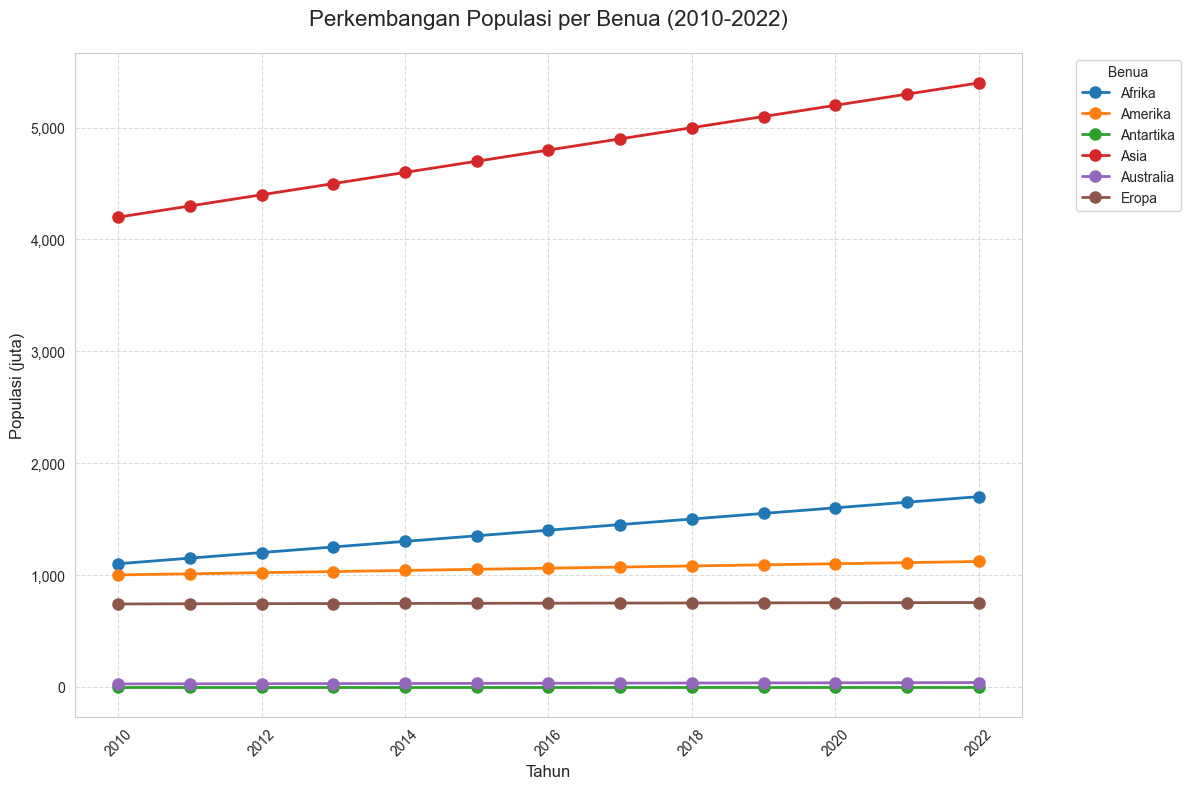

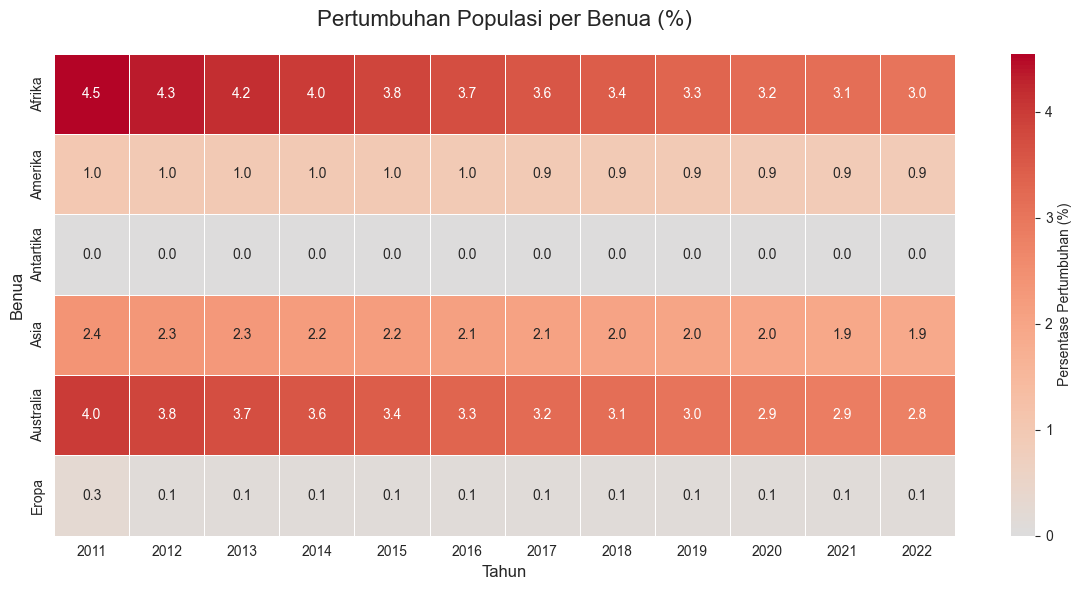

In [15]:
if __name__ == "__main__":
    # 1. Buat dan bersihkan data
    df = buat_data_contoh()
    df_clean = bersihkan_data(df)
    
    print("Contoh Data Setelah Pembersihan:")
    print(df_clean.head())
    
    # 2. Visualisasi dengan Seaborn
    visualisasi_seaborn(df_clean)
    
    # 3. Visualisasi dengan Matplotlib
    visualisasi_matplotlib(df_clean)
    
    # 4. Analisis pertumbuhan (opsional)
    analisis_pertumbuhan(df_clean)